In [1]:
# librerias y configuración

import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importar archivos

train = pd.read_csv('../data/salaries_data.csv')

y_train = pd.DataFrame(train.salary_in_usd)

test = pd.read_csv('../data/testeo.csv')

In [3]:
# se revisan los data frames

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary              500 non-null    int64 
 5   salary_currency     500 non-null    object
 6   salary_in_usd       500 non-null    int64 
 7   employee_residence  500 non-null    object
 8   remote_ratio        500 non-null    int64 
 9   company_location    500 non-null    object
 10  company_size        500 non-null    object
dtypes: int64(4), object(7)
memory usage: 43.1+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           107 non-null    int64 
 1   experience_level    107 non-null    object
 2   employment_type     107 non-null    object
 3   job_title           107 non-null    object
 4   employee_residence  107 non-null    object
 5   remote_ratio        107 non-null    int64 
 6   company_location    107 non-null    object
 7   company_size        107 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.8+ KB


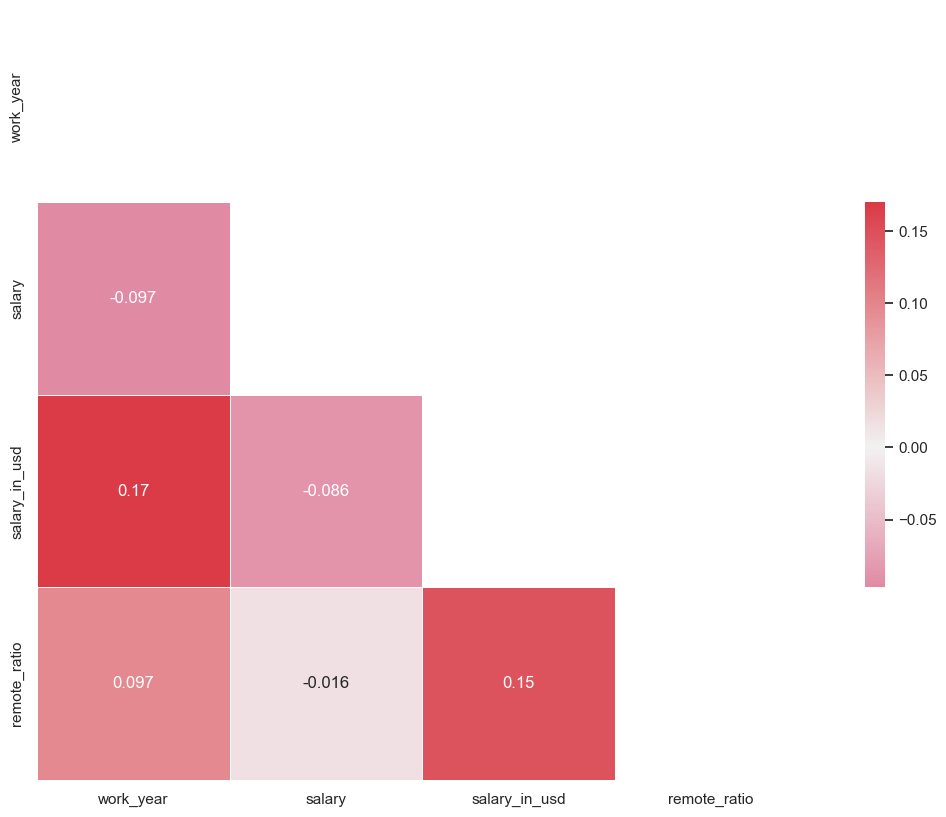

In [6]:
# se observarn las correlaciones en train, decidiendo no hacer nada ya que ninguna es alta

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [7]:
# se borran las columnas de train que no existen en test

train.drop(labels=['salary', 'salary_currency', 'salary_in_usd'], axis=1, inplace=True)

In [8]:
# se realiza un get_dummies con todas las columnas

for e in train.columns:

    train = pd.get_dummies(train, columns=[e], drop_first=True)
    test = pd.get_dummies(test, columns=[e], drop_first=True)    

In [9]:
# se iguala la cantidad de columnas de ambos df

# se identifican las columnas de ambos DataFrames

cols1 = set(train.columns)
cols2 = set(test.columns)

# se crea una lista con todas las columnas, sin duplicados

all_cols = list(cols1.union(cols2))

# se añaden las columnas faltantes a cada DataFrame

train = train.reindex(columns=all_cols, fill_value=0)
test = test.reindex(columns=all_cols, fill_value=0)

In [10]:
# se vuleven a juntar las características con el objetivo en train

train = pd.concat([train, y_train], axis=1)

In [11]:
# se guardan los csv

train.to_csv('../data/train.csv', index=False)

test.to_csv('../data/test.csv', index=False)